In [127]:
import numpy as np

import matplotlib.pyplot as plt

# Finite Volumes

We want a method that perserves conservation laws. We look first at advection.

Here we see three different types of grids.

![finite-difference grid](https://drive.google.com/uc?id=12AOxE_ZKA1d6hzQkHcKydidFun0XHlOm)

The first two are finite difference grids where the data represented at a specific point in the domain. The only differene between them is the where the point is specified in each cell. The first has the data specificed on the right hand side of each cell while the second has the data specified in the centre of each cell. 

The third grid is a finite-volume grid. Here, we do not think of the data living at a specific point, but insteadwe keep track of the total amount of a quantity (or its average) in a volume. This is represented above as the shaded region inside our zone.


## Cell-Averages

Imagine we have a function $f(x)$ that we represent with our grid using a finite-volume discretization.

We can define an average of $f(x)$ in a zone that goes from $x_{i-1/2}$ to $x_{i + 1/2}$ as:

$$ \langle f \rangle_{i} = \frac{1}{\Delta x} \int^{x_{i+1/2}}_{x_{i-1/2}} f(x) dx $$

The angle brackets indicate that this is an average and the subscript $i$ indicates that this data lives in a zone $i$.

Now consider the linear aadvection equation:

$$ \frac{\partial a}{\partial t} = -u \frac{\partial a}{\partial x} $$

written in conservation form as:

$$ \frac{\partial a}{\partial t} = -\frac{\partial F(a)}{\partial t} $$

where $F(a) = ua $ is the flux.

Let's average this equation over a zone, $[x_{i-1/2}, x_{i+1/2}]$:

$$ \frac{1}{\Delta x} \int^{x_{i+1/2}}_{x_{i-1/2}} \frac{\partial a}{\partial t} dx = - \frac{1}{\Delta x} \int^{x_{i+1/2}}_{x_{i-1/2}} \frac{\partial F(a)}{\partial x} dx $$

We can recognize the left is the time-derivative of the average of $a$ and the right, via the divergence theorem, is the flux difference through the boundary of the zone:

$$\frac{\partial}{ \partial t} \langle a \rangle_{i} = - \frac{1}{\Delta x}[F_{i+1/2} - F_{i-1/2}]$$

## Time Update

Let's start with a first-order update in time. We can use the Euler method we already saw:

$$ \frac{\partial \langle a \rangle}{\partial t} \approx \frac{\langle a \rangle^{n+1} - \langle a \rangle^{n}}{\Delta t} $$

in which case our update appears as:

$$ \langle a \rangle^{n+1}_{i} = \langle a \rangle^{n}_{i} - \frac{\Delta t}{\Delta x} (F^{n}_{i+1/2} - F^{n}_{i-1/2}) $$

We expect this to be first-order accurate in time. Notice that the fluxes are evaluated at the old time.

## Reconstruction and the Riemann Problem

We need to value of the flux on the interface, $F_{i+1/2}$, we use the analytic expression for the flux, $F(a)$, as:

$$ [F(a)]_{i+1/2} = F(a_{i+1/2}) $$

So now we just need to find $a_{i+1/2}$.

Getting the value of $a$ on the interface from the average, $\langle a \rangle$ is called reconstruction. It means we need to infer how $a$ actually varies throughout the cell just from the information we have about its average value. There are a variety of methods we can use. For now, we will do the simplest and assume that $a(x)$ is constant in each cell:

$$ a_{i+1/2, L} = a^{n}_{i} $$
$$ a_{i+1/2, R} = a^{n}_{i+1}$$

Notice that we actually have two values for the interface state when we do this, one coming from both the left ($L$) and right ($R$) side of the states.

In order to resolve this degeneracy -- which of the two states, or what combination of them, is the correct interface state?  The physics of the problem comes into play here and this is called the Riemann Problem.

For the advection equation this is not too difficult. We know that for $u>0$ that $a(x)$ moves from left to right, so the correct state on the interface is the left state -- this is upwinding.

$$
a_{i+1/2} = \mathcal{R}(a_{i+1/2, L}, a_{i+1/2, R}) = 
\left \{ 
\begin{array}{c}
  a_{i+1/2, L}, \quad u > 0 \\ 
  a_{i+1/2, R}, \quad u < 0
\end{array} 
\right .
$$

where we indicate the Riemann Problem as $\mathcal{R}(a_{i+1/2, L}, a_{i+1/2, R})$

For the advection equation with $u > 0$, our interface states are

$$ F_{i+1/2} = F(a_{i+1/2}) = u a_{i+1/2} = u \langle a \rangle_{i}$$

$$F_{i-1/2} = F(a_{i-1/2}) = u a_{i-1/2} = u \langle a \rangle_{i-1} $$

Inserting these interface states intion our difference equation, we have:

$$\langle a \rangle^{n+1}_{i} = \langle a \rangle^{n}_{i} - \frac{\Delta t}{\Delta x} ( \langle a \rangle^{n}_{i} - \langle a \rangle^{n}_{i-1}) $$

This is precisely the upwaind finite-difference scheme we saw earlier.

# Second-Order Advection

TO get a more accurate solution, we must handle both the space and time discretizations in a higher-order fashion.

First, let's substitute a Taylor expansion about $x_{i}$ into our Finite-Volume time average:

$$ \langle a \rangle_{i} = \frac{1}{\Delta x} \int^{x_{i+1/2}}_{x_{i-1/2}} a(x) dx$$

$$ a(x) = a(x_{i}) + \left . \frac{\partial a}{\partial x} \right |_{i} (x - x_{i}) + \left . \frac{1}{2} \frac{\partial^{2} a}{\partial t^{2}} \right |_{i} (x - x_{i})^{2} + \mathcal{O}(\Delta x^{3})  $$

which when we substitute becomes

$$ \langle a \rangle_{i} = \frac{1}{\Delta x} \int^{x_{i+1/2}}_{x_{i-1/2}} \left [ a(x_{i} + \left . \frac{\partial a}{\partial x} \right |_{i} (x - x_{i}) + \left . \frac{1}{2} \frac{\partial^{2} a}{\partial x^{2}} \right |_{i} (x - x_{i})^{2} + \mathcal{O}(\Delta x^{3}) \right ] dx $$

Looking at the terms we can make the following observations:
 * the first term is just constant, so it's integral is just $a(x_{i}) \Delta x$
 * the second term is off over the interface $[x_{i-1/2}, x_{i+1/2}]$ so it integrates to zero
 * the third term will integrate to something like $(\Delta x)^{3}$ before we divide by the $\Delta x$ coefficient

This means that:

$$ \langle a \rangle_{i} = a(x_{i}) + \mathcal{O}(\Delta x^{2}) $$

So it we work to the second-order in space, we will not need to worry about the difference between the cell average and the cell centre.

To the notation easier, we will drop the $\langle \rangle$ from now on in this sheet.

There are two broad ways to handle the time integration to get more accuaracy:

 * Predict our interface states at the idpoint in time using a Taylor expansion (in both space and time). This would result in a time-centred interface state, This procedure is called $\mbox{characteristic tracing}$.
 * Construct high-order interface states in space, ignoring how they evolve in time and use a high-order integrator (like Runge-Kutta) to handle the time integration. This is called the $\mbox{method of lines approach}$

Here we will use the methods of lines. 

## Piecewise Linear Reconstruction

For the first order method, we did the reconstruction to the interfaces by assuming that $a(x)$ is a constant in a cell. This is called a piecewise constant reconstruction. 

To higher-order accurate, we will need to allow for some variation in the zone. The easiest way to approach this is to allow $a(x)$ to vary linearly in the zone. This is called a $\mbox{piecewise linear reconstruction}$. 

![piecewise linear reconstruction](https://drive.google.com/uc?id=1Q6utoTlmYdAEB2xDyyH6yG5cUJo-mOrt)


IN the above figure, the cell average is represented by the dotted gray line and the reconstructed slopes, $\Delta a_{i}$, are the solid red lines. We can use a centered-difference for the slope, e.g.:

$$\Delta a_{i} = \frac{a_{i+1} - a_{i-1}}{2}$$

OUr reconstructed form of $a(x)$ in this case is:

$$a(x) = \frac{\Delta a_{i}}{\Delta x} (x - x_{i}) + a_{i}$$

and this in conservative form is:

$$\frac{1}{\Delta x} \int^{x_{i+1/2}}_{x_{i-1/2}} a(x) dx = a_{i}$$

Then we construct the interface states by following the slope from the value $a_{i}$ at $x_{i}$ to the two interfaces for that zone. Note that zone $i$ connects to the right hand state on the left interface $(i-1/2)$ and the left state on the right interface $(i+1/2)$:

![cell details](https://drive.google.com/uc?id=1m2vf3bD8Opw_OjAb3wXTM8weU15xsMGT)

There is one additional complication: we need the interface state just outside the domain, which means that we need to construct a slope there, which in turn means that we need to have an additional ghost cell to allow us to compute the centered-differene slope. So for this method, we need two ghost cells  each side.

![fv-ghost](https://drive.google.com/uc?id=123-hPjqwtQGtCiz_vr16VvA7RI1vzlng)

## Implementation

To start, we need a class that will hold the data on a finite-volume grid and knows how to fill ghost cells on any array that lives in the domain.

In [128]:
class FVGrid:

    def __init__(self, nx, ng=2, xmin=0.0, xmax=1.0):

        self.xmin = xmin
        self.xmax = xmax
        self.ng = ng
        self.nx = nx

        # python is zero-based.  Make easy intergers to know where the
        # real data lives
        self.ilo = ng
        self.ihi = ng+nx-1

        # physical coords -- cell-centered, left and right edges
        self.dx = (xmax - xmin)/(nx)
        self.x = xmin + (np.arange(nx+2*ng)-ng+0.5)*self.dx
        self.xl = xmin + (np.arange(nx+2*ng)-ng)*self.dx
        self.xr = xmin + (np.arange(nx+2*ng)-ng+1.0)*self.dx

        # storage for the solution
        self.a = self.scratch_array()
        self.ainit = self.scratch_array()

    def period(self, u):
        """ return the period for advection with velocity u """
        return (self.xmax - self.xmin) / np.abs(u)

    def scratch_array(self):
        """ return a scratch array dimensioned for our grid """
        return np.zeros((self.nx+2*self.ng), dtype=np.float64)

    def fill_BCs(self, atmp):
        """ fill all ghostcells with periodic boundary conditions """

        # left boundary
        for n in range(self.ng):
            atmp[self.ilo-1-n] = atmp[self.ihi-n]

        # right boundary
        for n in range(self.ng):
            atmp[self.ihi+1+n] = atmp[self.ilo+n]

    def norm(self, e):
        """ return the norm of quantity e which lives on the grid """
        if not len(e) == (2*self.ng + self.nx):
            return None

        return np.sqrt(self.dx*np.sum(e[self.ilo:self.ihi+1]**2))
    
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)

        ax.plot(self.x, self.ainit, label="initial conditions")
        ax.plot(self.x, self.a)
        ax.legend()
        return fig

Now we will use 2nd order Runge-Kutta. USing the same ideas as previously constructed with RK2, we will want a RHS function that we can call that just gives the update. Here we are thinking our equation as:

$$ \dot{y}_{i} = g(y_{i}) $$

where

$$g(y_{i}) = -\frac{1}{\Delta x} \left [ F(a_{i+1/2}) - F(a_{i-1/2}) \right ] $$

We will need to store interface values (which we have been denoting with half integer subscripts like $a_{i-1/1}$) as arrays which only take integer indices. We will adopt the common convention that when an array referes to an interface state, it denotes the left interface cell.

E.g.: aint[i] mean $a_{i-1/2}$

This is illustrated belows for arrays a[] which stores cell center quantities and aint[] which stores interface values:

![array labels](https://drive.google.com/uc?id=11Ep6ECt7lJzgtPzym2lZ6e_2VXANshU7)

In [129]:
def flux_update(gr, u, a):
    """compute -div{F} for linear advection"""

    # slope
    da = gr.scratch_array()
    da[gr.ilo-1:gr.ihi+2] = 0.5*(a[gr.ilo:gr.ihi+3] - a[gr.ilo-2:gr.ihi+1])

    # upwinding means that we take the left state always
    # convection: aint[i] = a_{i-1/2}
    aint = gr.scratch_array()
    aint[gr.ilo:gr.ihi+2] = a[gr.ilo-1:gr.ihi+1] + 0.5*da[gr.ilo-1:gr.ihi+1]

    flux_diff = gr.scratch_array()
    flux_diff[gr.ilo:gr.ihi+1] = u * (aint[gr.ilo:gr.ihi+1] - aint[gr.ilo+1:gr.ihi+2]) / gr.dx

    return flux_diff

Now we write the time update. This is going to look a lot like what we did with orbits. The main thing we need to remember is that we need to fill the ghost cells before we compute RHS

In [130]:
def advection_mol(nx, u, C, num_periods=1, init_cond=None):

    # create a grid
    g = FVGrid(nx, ng=2)

    tmax = num_periods * g.period(u)

    # setup initial conditions
    init_cond(g)

    g.ainit[:] = g.a[:]
    
    # compute the timestep
    dt = C * g.dx / np.abs(u)

    t = 0.0
    while t < tmax:

        if t + dt > tmax:
            dt = tmax - t

        # second-order RK integration
        g.fill_BCs(g.a)
        k1 = flux_update(g, u, g.a)

        atmp = g.scratch_array()
        atmp[:] = g.a[:] + 0.5 * dt * k1[:]

        g.fill_BCs(atmp)
        k2 = flux_update(g, u, atmp)

        g.a[:] += dt * k2[:]

        t += dt

    return g

In [131]:
def tophat(g):
    g.a[:] = 0.0
    g.a[np.logical_and(g.x >= 1./3, g.x <= 2./3.)] = 1.0

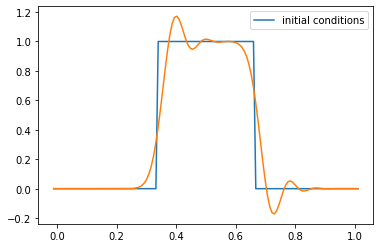

In [132]:
C = 0.5
u = 1.0
nx = 128

g = advection_mol(nx, u, C, init_cond=tophat)
fig = g.plot()

# Exercises

## 1 Different IC

Implement initial conditions corresponding to a Gaussian and run the solver. Compare to the previous solution

In [133]:
def Gaussian(g):
  g.a[:] = np.exp(-(g.x - 0.5)**2/0.1)

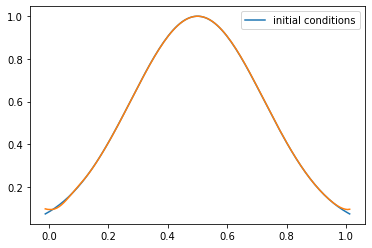

In [134]:
g = advection_mol(nx, u, C, init_cond=Gaussian)
fig = g.plot()

We do not see oscillations near the discontinuities with the Gaussian initial conditions versus the TopHat IC since the Gaussian is a smooth function.

Godunov's Theorem: Any monotonic linear method for advection is first order accurate.

.......and the converse is true too. This means that in order ti be monotonic and second-order accurate, we need to make our method nonlinear.

This will be accomplished through the use of slope limiters.  A limiter modifies the piecewise linear slopes near extrema to prevent overshoots. Mathematically they enforce a property called total variation diminishing.

A simple limiter is the minmod limiter:

$$ \Delta a_{i} = \mbox{minmod}(a_{i} - a_{i-1}, a_{i+1} - a_{i}) $$

with

$$\mbox{minmod}(a,b) = \left \{ \begin{array} & a & \text{if} \phantom{a} |a| < |b| \phantom{a} \text{and} \phantom{a} a \cdot b > 0 \\ b & \text{if} \phantom{a} |b| < |a| \phantom{a} \text{and} \phantom{a} a \cdot b > 0 \\ 0 & otherwise \end{array} \right . $$

Most limiters have a form like this. The key is to check $a \cdot b > 0$. That is checking if the slopes on the left an the right of the interfaces are the same sign. If they are not the same sign, then we are at an extrema and those are the situations where we want to limit.

Here is a visulaization of the limiter:

![limiter](https://drive.google.com/uc?id=1Dr2d1AM8XZqnEqGEqweDQEIYlMLugQml)

The gray lines are the original unlimited slopes. Notice that the slopes at $i-2$ goes well above the original data on the right edge of the domain. That zone is a maximum. The limited slopes are shown in red. For zone $i-1$ the result of the limiting is to completely flatten the profile. We go to piecewise constant in that zone.

## 2 Slope Limiter

Adapt the second-order advection code to limit the slopes using the minmod limiter and rerun the Gaussian and Tophat IC

In [135]:
def flux_minmod(gr, u, a):
    """compute -div{F} for linear advection"""

    # slope
    # dl = a_i - a_{i-1}
    dl = gr.scratch_array()
    dl[gr.ilo-1:gr.ihi+2] = a[gr.ilo-1:gr.ihi+2] - a[gr.ilo-2:gr.ihi+1]

    # dr = a_{i+1} - a_i
    dr = gr.scratch_array()
    dr[gr.ilo-1:gr.ihi+2] = a[gr.ilo:gr.ihi+3] - a[gr.ilo-1:gr.ihi+2]
    
    d1 = np.where(np.fabs(dl) < np.fabs(dr), dl, dr)
    da = np.where(dl*dr > 0.0, d1, 0.0)
    
    # upwinding means that we take the left state always
    # convection: aint[i] = a_{i-1/2}
    aint = gr.scratch_array()
    aint[gr.ilo:gr.ihi+2] = a[gr.ilo-1:gr.ihi+1] + 0.5*da[gr.ilo-1:gr.ihi+1]

    flux_diff = gr.scratch_array()
    flux_diff[gr.ilo:gr.ihi+1] = u * (aint[gr.ilo:gr.ihi+1] - aint[gr.ilo+1:gr.ihi+2]) / gr.dx

    return flux_diff

In [136]:
def advection_minmod(nx, u, C, num_periods=1, init_cond=None):

    # create a grid
    g = FVGrid(nx, ng=2)

    tmax = num_periods * g.period(u)

    # setup initial conditions
    init_cond(g)

    g.ainit[:] = g.a[:]
    
    # compute the timestep
    dt = C * g.dx / np.abs(u)

    t = 0.0
    while t < tmax:

        if t + dt > tmax:
            dt = tmax - t

        # second-order RK integration
        g.fill_BCs(g.a)
        k1 = flux_minmod(g, u, g.a)

        atmp = g.scratch_array()
        atmp[:] = g.a[:] + 0.5 * dt * k1[:]

        g.fill_BCs(atmp)
        k2 = flux_minmod(g, u, atmp)

        g.a[:] += dt * k2[:]

        t += dt

    return g

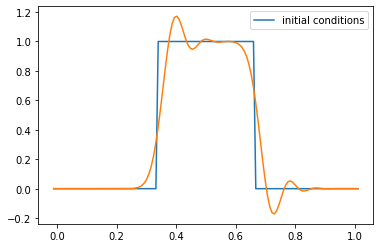

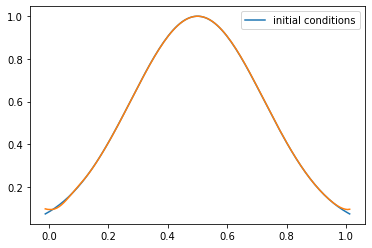

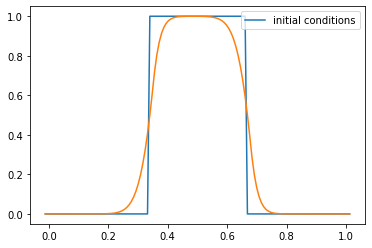

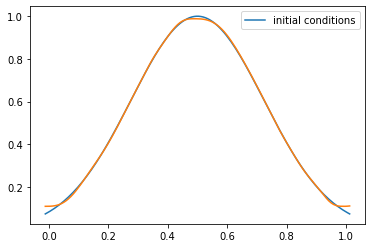

In [137]:
C = 0.5
u = 1.0
nx = 128

g = advection_mol(nx, u, C, init_cond=tophat)
fig = g.plot()

g = advection_mol(nx, u, C, init_cond=Gaussian)
fig = g.plot()

g = advection_minmod(nx, u, C, init_cond=tophat)
fig = g.plot()

g = advection_minmod(nx, u, C, init_cond=Gaussian)
fig = g.plot()

## 3 Convergence Comparison

Let's take a look at the convergence. Compute the norm of the error after one period with and without the limiters for the sine IC.

In [138]:
def sine(g):
  g.a[:] = 1.0 + 0.5 * np.sin(2.0 * np.pi * g.x)

In [139]:
u = 1.0
C = 0.5

for nx in [32, 62, 128, 256, 512, 1024]:
  g = advection_mol(nx, u, C, init_cond = sine)
  print(f"{nx:4d}: {g.norm(g.a - g.ainit):0.8f}")

for nx in [32, 62, 128, 256, 512, 1024]:
   g = advection_minmod(nx, u, C, init_cond = sine)
   print(f"{nx:4d}: {g.norm(g.a - g.ainit):0.8f}")

  32: 0.01068133
  62: 0.00285103
 128: 0.00066908
 256: 0.00016727
 512: 0.00004182
1024: 0.00001045
  32: 0.03721840
  62: 0.01391694
 128: 0.00421420
 256: 0.00132975
 512: 0.00041944
1024: 0.00013236
